In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import bagging
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_validate

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
%store -r cdc_new

pd.set_option('display.max_columns', 500)

cdc_new.head()



,age,sex,race,martial,weight,height,overweight,education,income,home,employment,health,binge,coverage,checkup,primaryphysician,exercise,heavyalcohol,smoker,any_alcohol,sleep_avg,heart_dis,cancer,depression,stroke,diabete3,asthma3,heart_attack,skin_cancer,chronic_bronchitis,kidney_disease,arthritis,bmi,obese,comorbid,chronic
0,1.000000,1.0,0.0,0.666667,0.085763,0.422222,1.0,1.000000,0.010101,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.131337,0.0,0.0,1.0
1,0.241935,1.0,0.2,1.000000,0.205832,0.444444,0.0,1.000000,0.000000,0.0,1.0,0.5,0.0,0.0,0.333333,1.0,1.0,0.0,1.0,1.0,0.173913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231763,1.0,0.0,0.0
2,0.935484,1.0,0.0,0.666667,0.106346,0.288889,0.0,0.333333,0.000000,1.0,0.5,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.260870,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198764,0.0,1.0,1.0
3,0.774194,0.0,0.0,0.333333,0.188679,0.555556,0.0,0.333333,0.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176642,0.0,0.0,0.0
4,1.000000,1.0,0.0,0.666667,0.157804,0.377778,0.0,0.666667,1.000000,1.0,0.5,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.217391,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.215074,1.0,1.0,1.0


In [35]:
cdc_new.heart_attack.value_counts()

0.0    365481
1.0     23944
Name: heart_attack, dtype: int64

In [36]:
print('chronic', cdc_new.chronic.value_counts(normalize=True))
print('comorbid', cdc_new.comorbid.value_counts(normalize=True))
print('sex', cdc_new.sex.value_counts(normalize=True))

chronic 1.0    0.508575
0.0    0.491425
Name: chronic, dtype: float64
comorbid 0.0    0.762755
1.0    0.237245
Name: comorbid, dtype: float64
sex 1.0    0.535818
0.0    0.464182
Name: sex, dtype: float64


In [37]:
chronic_conditions = cdc_new[['heart_dis', 'cancer', 'stroke', 'heart_attack', 'diabete3' ,
             'chronic_bronchitis', 'kidney_disease', 'arthritis']]
chronic_conditions['sum'] = chronic_conditions.sum(axis=1)

chronic_conditions.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,heart_dis,cancer,stroke,heart_attack,diabete3,chronic_bronchitis,kidney_disease,arthritis,sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


In [42]:
print(chronic_conditions.heart_dis.value_counts())
print(chronic_conditions.cancer.value_counts())
print(chronic_conditions.stroke.value_counts())
print(chronic_conditions.heart_attack.value_counts())
print(chronic_conditions.diabete3.value_counts())
print(chronic_conditions.chronic_bronchitis.value_counts())
print(chronic_conditions.kidney_disease.value_counts())
print(chronic_conditions.arthritis.value_counts())

0.0    353246
1.0     36179
Name: heart_dis, dtype: int64
0.0    351098
1.0     38327
Name: cancer, dtype: int64
0.0    372812
1.0     16613
Name: stroke, dtype: int64
0.0    365481
1.0     23944
Name: heart_attack, dtype: int64
0.0    325334
1.0     64091
Name: diabete3, dtype: int64
0.0    356386
1.0     33039
Name: chronic_bronchitis, dtype: int64
0.0    374791
1.0     14634
Name: kidney_disease, dtype: int64
0.0    256222
1.0    133203
Name: arthritis, dtype: int64


In [43]:
diseases = ['Heart diseases', 'Cancers', 'Stroke', 'Heart attack', 'Diabetes' ,
             'Chronic bronchitis', 'Kidney disease', 'Arthritis', ]

values = [ 36179, 38327, 16613, 23944, 64091, 33039, 14634, 133203
  ]


disease_df = pd.DataFrame(values)



disease_df['a'] = diseases

disease_df.reset_index(drop='first')

disease_df.columns = 'Total Cases', 'Chronic Conditions'

disease_df.sort_values(by = 'Total Cases', ascending=False)

,Total Cases,Chronic Conditions
7,133203,Arthritis
4,64091,Diabetes
1,38327,Cancers
0,36179,Heart diseases
5,33039,Chronic bronchitis
3,23944,Heart attack
2,16613,Stroke
6,14634,Kidney disease


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

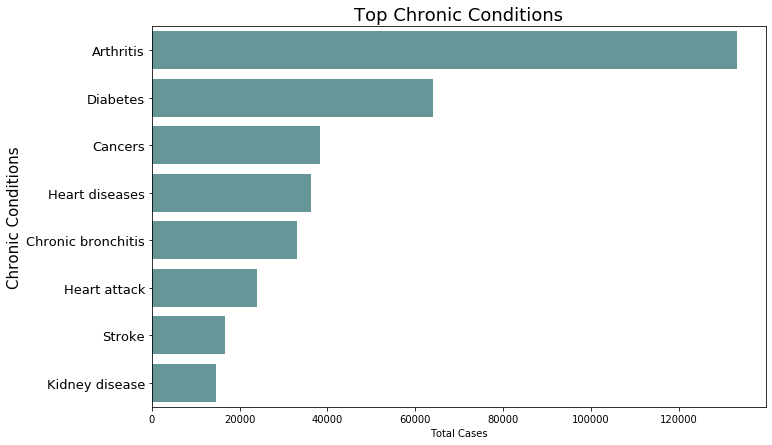

In [44]:
plt.figure(figsize=(11,7))
sns.barplot(data=disease_df.sort_values(by='Total Cases', ascending=False), x='Total Cases',  y='Chronic Conditions',
           color='cadetblue')
plt.title('Top Chronic Conditions', fontsize=18)
plt.ylabel('Chronic Conditions', fontsize=15)
plt.yticks(fontsize=13)
# plt.xticks([], [])

In [45]:
indicators = ['Age', 'BMI', 'Weight', 'Sleep Average',  'Employment',
              'Income', ]

nums = [2.2, 2.0, 1.8, 1.6, 1.2, 0.7, 0.5]

In [46]:
topss = pd.DataFrame(indicators)
topss['Strength of Indicators'] = nums

topss = topss.reset_index(drop='first')

topss.columns = ['Top Indicators', 'Strength of Indicators']

topss

ValueError: Length of values does not match length of index

In [47]:
a = topss['Top Indicators']
b = topss['Strength of Indicators']

plt.figure(figsize=(9,5))
sns.barplot(b, a, color='cadetblue')
plt.title('Top Risk Factors for Chronic Conditions', fontsize=15)
plt.ylabel('Top Indicators', fontsize=13)
plt.xlabel('Strength of Indicators', fontsize=13)
plt.yticks(fontsize=12)
plt.xticks([],[])

KeyError: 'Top Indicators'